In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
pitch_19 = pd.read_csv('2019_pitches.csv')
bat_19 = pd.read_csv('2019_atbats.csv')
player_name = pd.read_csv('player_names.csv')

In [4]:
player_name['full_name'] = player_name['first_name'] + ' ' + player_name['last_name']
player_name[player_name['last_name']=='Ryu']

,id,first_name,last_name,full_name
871,547943,Hyun-Jin,Ryu,Hyun-Jin Ryu


In [5]:
plus_bat = pd.merge(bat_19, player_name[['id', 'full_name']], left_on='batter_id', right_on='id').rename(columns={'full_name': 'batter_name'})
plus_pit = pd.merge(plus_bat, player_name[['id', 'full_name']], left_on='pitcher_id', right_on='id').rename(columns={'full_name': 'pitcher_name'})

In [6]:
at_bat_19 = plus_pit.drop(['id_x', 'id_y'], axis=1)
total = pd.merge(pitch_19, at_bat_19, on='ab_id')

total.head()

,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y,ax,...,g_id,p_score,batter_id,pitcher_id,stand,p_throws,event,o,batter_name,pitcher_name
0,0.00,2.15,88.8,80.7,placeholder,placeholder,22.8,4.8,24.0,-8.47,...,201900001.0,0.0,594777,571666,L,R,Flyout,1,Kole Calhoun,Mike Fiers
1,0.34,2.31,89.9,81.8,placeholder,placeholder,22.8,3.6,24.0,-7.10,...,201900001.0,0.0,545361,571666,R,R,Flyout,2,Mike Trout,Mike Fiers
2,-0.05,2.03,85.7,79.6,placeholder,placeholder,9.6,6.0,24.0,3.65,...,201900001.0,0.0,545361,571666,R,R,Flyout,2,Mike Trout,Mike Fiers
3,0.49,0.92,85.4,78.5,placeholder,placeholder,24.0,7.2,24.0,-13.77,...,201900001.0,0.0,545361,571666,R,R,Flyout,2,Mike Trout,Mike Fiers
4,-0.13,1.11,84.6,77.6,placeholder,placeholder,26.4,8.4,24.0,-15.99,...,201900001.0,0.0,545361,571666,R,R,Flyout,2,Mike Trout,Mike Fiers


In [7]:
# 류현진 pitching data
ryu = total[total['pitcher_name']=='Hyun-Jin Ryu']
ryu

,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y,ax,...,g_id,p_score,batter_id,pitcher_id,stand,p_throws,event,o,batter_name,pitcher_name
221,0.37,2.07,90.5,83.2,placeholder,placeholder,27.6,4.8,24.0,11.97,...,201900002.0,0.0,430945,547943,R,L,Strikeout,1,Adam Jones,Hyun-Jin Ryu
222,-0.97,3.08,87.7,81.7,placeholder,placeholder,4.8,6.0,24.0,3.12,...,201900002.0,0.0,430945,547943,R,L,Strikeout,1,Adam Jones,Hyun-Jin Ryu
223,-1.18,2.66,88.3,82.2,placeholder,placeholder,8.4,6.0,24.0,4.67,...,201900002.0,0.0,430945,547943,R,L,Strikeout,1,Adam Jones,Hyun-Jin Ryu
224,-0.42,0.59,91.5,84.3,placeholder,placeholder,31.2,4.8,24.0,13.89,...,201900002.0,0.0,430945,547943,R,L,Strikeout,1,Adam Jones,Hyun-Jin Ryu
225,0.63,3.03,90.2,83.2,placeholder,placeholder,27.6,4.8,24.0,10.32,...,201900002.0,0.0,430945,547943,R,L,Strikeout,1,Adam Jones,Hyun-Jin Ryu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590437,-0.93,2.78,89.9,83.1,placeholder,placeholder,21.6,4.8,24.0,9.40,...,201902401.0,2.0,596103,547943,R,L,Groundout,2,Austin Slater,Hyun-Jin Ryu
590438,0.25,3.29,80.3,73.3,placeholder,placeholder,21.6,7.2,24.0,10.01,...,201902401.0,2.0,572073,547943,R,L,Strikeout,3,Joey Rickard,Hyun-Jin Ryu
590439,-0.62,3.06,87.8,81.1,placeholder,placeholder,15.6,6.0,24.0,7.85,...,201902401.0,2.0,572073,547943,R,L,Strikeout,3,Joey Rickard,Hyun-Jin Ryu
590440,1.38,2.46,82.4,76.2,placeholder,placeholder,21.6,8.4,24.0,11.97,...,201902401.0,2.0,572073,547943,R,L,Strikeout,3,Joey Rickard,Hyun-Jin Ryu


In [8]:
ryu.columns

Index(['px', 'pz', 'start_speed', 'end_speed', 'spin_rate', 'spin_dir',
       'break_angle', 'break_length', 'break_y', 'ax', 'ay', 'az', 'sz_bot',
       'sz_top', 'type_confidence', 'vx0', 'vy0', 'vz0', 'x', 'x0', 'y', 'y0',
       'z0', 'pfx_x', 'pfx_z', 'nasty', 'zone', 'code', 'type', 'pitch_type',
       'event_num', 'b_score', 'ab_id', 'b_count', 's_count', 'outs',
       'pitch_num', 'on_1b', 'on_2b', 'on_3b', 'inning', 'top', 'g_id',
       'p_score', 'batter_id', 'pitcher_id', 'stand', 'p_throws', 'event', 'o',
       'batter_name', 'pitcher_name'],
      dtype='object')

### 류현진 구종 별 구사 비율

In [9]:
pitch_type = round(ryu.pitch_type.dropna().value_counts()/len(ryu.pitch_type.dropna()),3)
pitch_type

FF    0.273
CH    0.272
FC    0.197
FT    0.134
CU    0.120
SL    0.003
Name: pitch_type, dtype: float64

FF: Four-seam Fastball   
CH: Changeup   
FC: Cut Fastball   
FT: Two-seam Fastball   
CU: Curveball   
SL: Slider   

Text(0.5, 1.0, 'Ryu Hyun-jin Pitch Type')

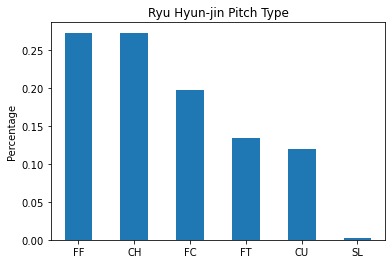

In [10]:
pitch_type.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Percentage')
plt.title('Ryu Hyun-jin Pitch Type')

### Four-seam Fastball

In [11]:
ff = ryu[ryu['pitch_type']=='FF']

In [12]:
# 구속
print('최고 구속: {0} mph'.format(ff['start_speed'].max()))
print('평균 구속: {0} mph'.format(round(ff['start_speed'].mean(),2)))
print('최저 구속: {0} mph'.format(ff['start_speed'].min()))

최고 구속: 93.5 mph
평균 구속: 90.72 mph
최저 구속: 86.3 mph


<AxesSubplot:xlabel='start_speed', ylabel='Density'>

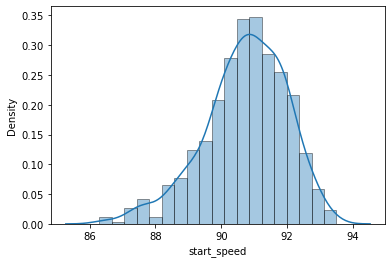

In [13]:
sns.distplot(ff['start_speed'], hist_kws=dict(edgecolor="k", linewidth=1))

In [14]:
ff['code'].unique()

array(['C', 'B', 'F', 'X', 'S', 'T', 'D', 'E', 'L', 'H'], dtype=object)

In [75]:
s_or_b = ff[(ff['code']=='C') | (ff['code']=='B') | (ff['code']=='F') |  (ff['code']=='S')][['px','pz','code','pitch_type']]
s_or_b

,px,pz,code,pitch_type
221,0.37,2.07,C,FF
223,-1.18,2.66,B,FF
224,-0.42,0.59,B,FF
225,0.63,3.03,C,FF
226,-0.91,1.86,F,FF
...,...,...,...,...
590398,0.28,2.83,F,FF
590408,-0.86,2.15,C,FF
590422,0.27,5.42,B,FF
590435,-1.41,3.36,B,FF


Text(0.5, 1.0, 'Strike Zone (Fourseam Fastball)')

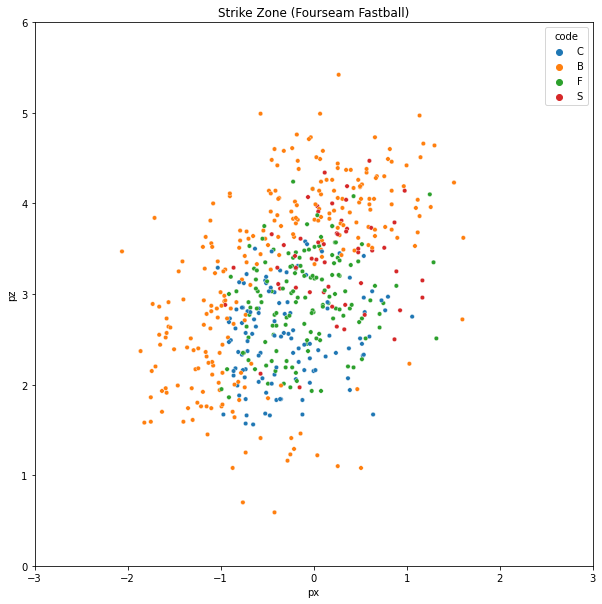

In [76]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='px', y='pz', hue='code',data=s_or_b, s=20)
plt.xlim(-3,3)
plt.ylim(0,6)
plt.title('Strike Zone (Fourseam Fastball)')

'C': Called Strike   
'B': Ball   
'F': Foul??
'S': Swing Strike
code 칼럼에 있는 'C', 'B', 'F', 'X', 'S', 'T', 'D', 'E', 'L', 'H' 데이터 값에 대한 설명이 없어 정확한 확인 불가  

In [16]:
# break_angle

ff['break_angle'].describe()

count    683.000000
mean      27.642167
std        4.797174
min        8.400000
25%       24.600000
50%       27.600000
75%       31.200000
max       40.800000
Name: break_angle, dtype: float64

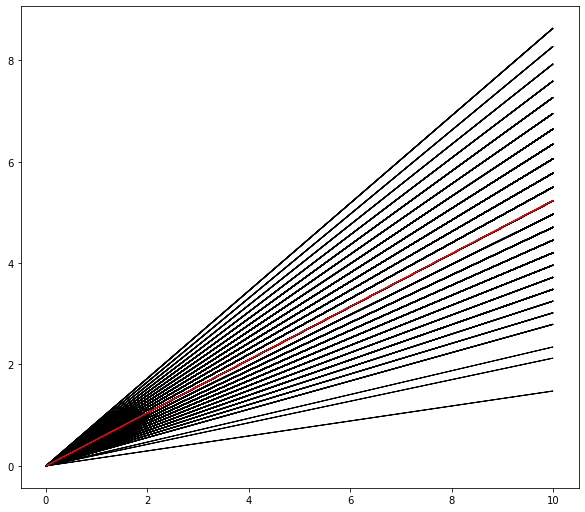

In [17]:
import math
plt.figure(figsize=(10,10))

for i in ff['break_angle']:
    plt.arrow(0,0, 10,math.tan(i*math.pi/180)*10,  width=0.00001 )
plt.arrow(0,0, 10, math.tan((ff['break_angle'].mean())*math.pi/180)*10, color='r')
plt.gca().set_aspect('equal')

<AxesSubplot:xlabel='break_angle'>

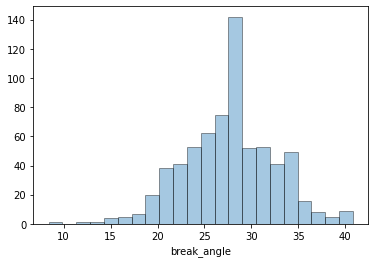

In [18]:
sns.distplot(ff['break_angle'], hist_kws=dict(edgecolor="k", linewidth=1), kde=False)

break_angle: 타구 각도?    
빨간선은 평균   
   
MLB Guidline:   
    * Ground ball: less than 10 degrees   
    * Line drive: 10-25 degrees   
    * Fly ball: 25-50 degrees   
    * Pop up: Greater than 50 degrees   
    
가이드라인을 보니까 타구 각도는 아닌거 같음.   
   
참조: 나중에 확인해 볼 내용   
https://gorangers.wordpress.com/2007/07/12/pitch-break-angle-vs-length/

## Changeup

In [19]:
ch = ryu[ryu['pitch_type']=='CH']
# 구속
print('최고 구속: {0} mph'.format(ch['start_speed'].max()))
print('평균 구속: {0} mph'.format(round(ch['start_speed'].mean(),2)))
print('최저 구속: {0} mph'.format(ch['start_speed'].min()))

최고 구속: 84.1 mph
평균 구속: 80.04 mph
최저 구속: 74.2 mph


<AxesSubplot:xlabel='start_speed', ylabel='Density'>

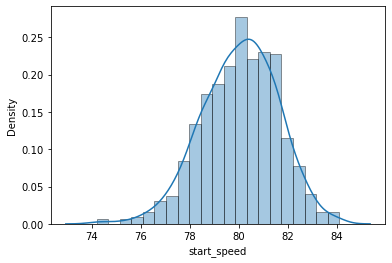

In [20]:
sns.distplot(ch['start_speed'], hist_kws=dict(edgecolor="k", linewidth=1))

In [107]:
ff_mean = pitch_19[pitch_19['pitch_type']=='FF']['start_speed'].mean()
ch_mean = pitch_19[pitch_19['pitch_type']=='CH']['start_speed'].mean()

print('MLB FF 평균 구속: {0} mph'.format(round(ff_mean,2)))
print('MLB CH 평균 구속: {0} mph'.format(round(ch_mean,2)))
print('MLB (FF 와 CH) 평균 구속 차이: {0} mph'.format(round(ff_mean-ch_mean,2)))
print(' ')
print('류현진 FF 평균 구속: {0} mph'.format(round(ff['start_speed'].mean(),2)))
print('류현진 CH 평균 구속: {0} mph'.format(round(ch['start_speed'].mean(),2)))
print('류현진 (FF 와 CH) 평균 구속 차이: {0} mph'.format(round(ff['start_speed'].mean()-ch['start_speed'].mean(),2)))

MLB FF 평균 구속: 93.4 mph
MLB CH 평균 구속: 84.49 mph
MLB (FF 와 CH) 평균 구속 차이: 8.91 mph
 
류현진 FF 평균 구속: 90.72 mph
류현진 CH 평균 구속: 80.04 mph
류현진 (FF 와 CH) 평균 구속 차이: 10.68 mph


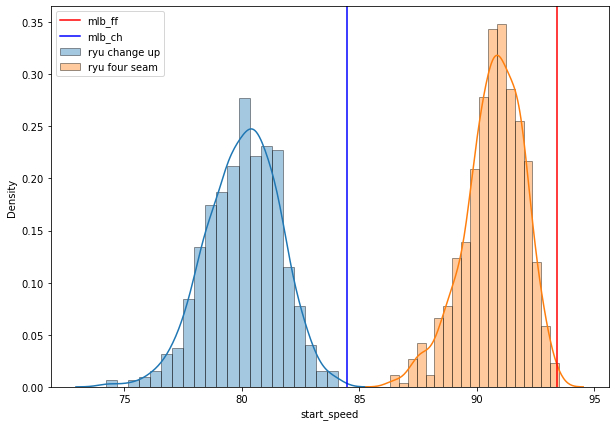

In [97]:
# four-seam fastball VS changeup 구속 비교
plt.figure(figsize=(10,7))
sns.distplot(ch['start_speed'],hist_kws=dict(edgecolor="k", linewidth=1), label='ryu change up')
sns.distplot(ff['start_speed'],hist_kws=dict(edgecolor="k", linewidth=1), label='ryu four seam')
plt.axvline(ff_mean, color='r', label='mlb_ff')
plt.axvline(ch_mean, color='b', label='mlb_ch')
plt.legend()
plt.show()

In [90]:
s_or_b_ch = ch[(ch['code']=='C') | (ch['code']=='B') | (ch['code']=='F') |  (ch['code']=='S')][['px','pz','code','pitch_type']]
total_sb = pd.concat([s_or_b,s_or_b_ch])
total_sb
total_sb.groupby('pitch_type')['code'].value_counts()

pitch_type  code
CH          B       181
            F       122
            S       114
            C        58
FF          B       247
            F       139
            C       115
            S        52
Name: code, dtype: int64

Text(0.5, 1.0, 'Strike Zone (Fourseam Fastball)')

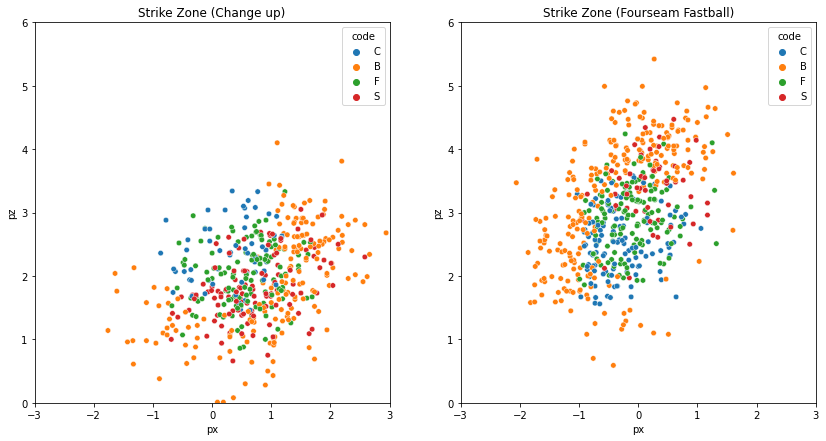

In [96]:
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
hue_order = ['C', 'B', 'F', 'S']
sns.scatterplot(x='px', y='pz', hue='code', hue_order=hue_order,data=total_sb[total_sb['pitch_type']=='CH'], s=30)
plt.xlim(-3,3)
plt.ylim(0,6)
plt.title('Strike Zone (Change up)')
plt.subplot(1,2,2)
sns.scatterplot(x='px', y='pz', hue='code',hue_order=hue_order, data=total_sb[total_sb['pitch_type']=='FF'], s=30)
plt.xlim(-3,3)
plt.ylim(0,6)
plt.title('Strike Zone (Fourseam Fastball)')

## 투구 수 & 이벤트

In [22]:
# 구종별 이벤트
# event: 결과
# pitch_type: 구종
# pitch_num: 타자한테 던진 공 수
# batter_name: 타자
last_shot = ryu.groupby('ab_id')[['g_id','event','pitch_type','pitch_num','batter_name']].max()
last_shot

,g_id,event,pitch_type,pitch_num,batter_name
ab_id,,,,,
2.019000e+09,201900002.0,Strikeout,FF,8.0,Adam Jones
2.019000e+09,201900002.0,Single,FF,4.0,Eduardo Escobar
2.019000e+09,201900002.0,Strikeout,FF,6.0,Wilmer Flores
2.019000e+09,201900002.0,Strikeout,FF,4.0,David Peralta
2.019000e+09,201900002.0,Groundout,CU,2.0,Christian Walker
...,...,...,...,...,...
2.019185e+09,201902401.0,Groundout,FF,5.0,Buster Posey
2.019185e+09,201902401.0,Lineout,FT,3.0,Evan Longoria
2.019185e+09,201902401.0,Pop Out,CH,1.0,Kevin Pillar


In [23]:
# 게임 별 투구 수
total_ball = last_shot.groupby('g_id').sum('pitch_num')
total_ball

,pitch_num
g_id,
201900002.0,82.0
201900077.0,78.0
201900143.0,33.0
201900299.0,92.0
201900382.0,80.0
201900444.0,107.0
201900518.0,93.0
201900599.0,116.0
201900679.0,81.0


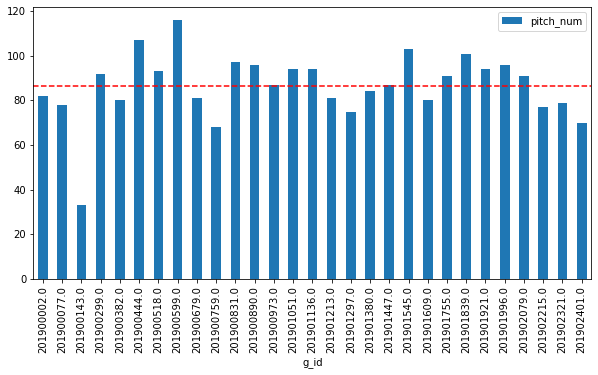

In [24]:
total_ball.plot(kind='bar',figsize=(10,5))
plt.axhline(total_ball['pitch_num'].mean(), color='r', linestyle='--')

In [25]:
# 류현진에게 던지게 한 평균 공 수
throws_by_batter = last_shot.groupby('batter_name').mean('pitch_num')
throws_by_batter.sort_values(by='pitch_num', ascending=False).head(10)

,g_id,pitch_num
batter_name,,
Michael A. Taylor,201900599.0,7.000000
Matt Carpenter,201900143.0,7.000000
Mike Trout,201900973.0,6.000000
Stephen Strasburg,201900599.0,6.000000
Paul Goldschmidt,201900143.0,6.000000
Adeiny Hechavarria,201901234.2,5.800000
Chris Iannetta,201901166.8,5.800000
Manny Machado,201901297.0,5.666667
Lorenzo Cain,201900299.0,5.666667


In [26]:
# event 비율
event_count = last_shot.groupby('event').agg({'event':'count'}).rename(columns={'event': 'count'}).sort_values(by='count', ascending=False)
event_count

,count
event,
Groundout,160
Strikeout,146
Single,94
Flyout,59
Lineout,49
Double,33
Walk,21
Pop Out,21
Grounded Into DP,17


In [27]:
# Groundout 구종 비교
g_out = last_shot[last_shot['event']=='Groundout']
g_out_type = round(g_out.groupby('pitch_type')['event'].count()/len(g_out),2)
g_out_type.sort_values(ascending=False)

pitch_type
FF    0.48
FT    0.38
FC    0.08
CU    0.03
CH    0.03
SL    0.01
Name: event, dtype: float64

Text(0, 0.5, 'Percentage')

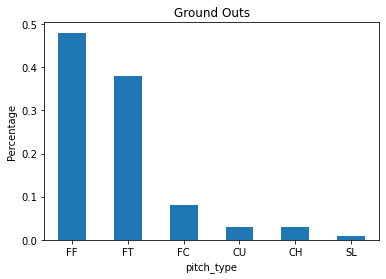

In [28]:
g_out_type.sort_values(ascending=False).plot.bar()
plt.xticks(rotation=0)
plt.title('Ground Outs')
plt.ylabel('Percentage')

In [29]:
# StrikeOut 구종 비교
s_out = last_shot[last_shot['event']=='Strikeout']
s_out_type = round(s_out.groupby('pitch_type')['event'].count()/len(s_out),2)
s_out_type.sort_values(ascending=False)

pitch_type
FF    0.49
FT    0.39
FC    0.09
CU    0.03
Name: event, dtype: float64

Text(0, 0.5, 'Percentage')

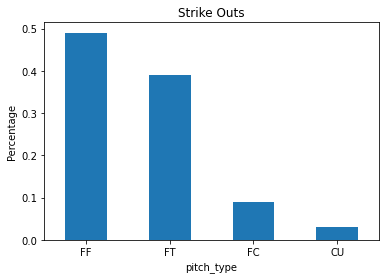

In [30]:
s_out_type.sort_values(ascending=False).plot.bar()
plt.xticks(rotation=0)
plt.title('Strike Outs')
plt.ylabel('Percentage')

In [31]:
# Fly Out 구종 비교
f_out = last_shot[last_shot['event']=='Flyout']
f_out_type = round(f_out.groupby('pitch_type')['event'].count()/len(s_out),2)
f_out_type.sort_values(ascending=False)

pitch_type
FF    0.17
FT    0.16
FC    0.03
CU    0.02
SL    0.01
CH    0.01
Name: event, dtype: float64

Text(0, 0.5, 'Percentage')

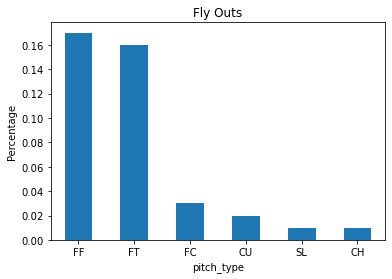

In [32]:
f_out_type.sort_values(ascending=False).plot.bar()
plt.xticks(rotation=0)
plt.title('Fly Outs')
plt.ylabel('Percentage')

In [108]:
# 류현진의 체인지업
cu = last_shot[last_shot['pitch_type']=='CH']
cu.groupby('event')['event'].count()

event
Bunt Groundout      1
Bunt Pop Out        1
Double              1
Flyout              1
Forceout            1
Grounded Into DP    2
Groundout           5
Home Run            1
Lineout             5
Pop Out             3
Single              4
Name: event, dtype: int64

위의 류현진의 구종 구사 비율에서 2위를 차지했던 체인지업(27.2%)   
그러나 생각보다 마지막에 던졌던 공이 체인지업인 경우가 별로 없다.   

## 류현진이 맞은 홈런

In [117]:
# 구종
hr = last_shot[last_shot['event']=='Home Run']
hr.groupby('pitch_type')['event'].count().sort_values(ascending= False).reset_index().rename(columns={'event': 'count'})

,pitch_type,count
0,FF,9
1,FT,3
2,CU,2
3,FC,1
4,CH,1


In [120]:
# 홈런을 친 타자
hr.groupby('batter_name')['event'].count().sort_values(ascending= False).reset_index().rename(columns={'event': 'count'})

,batter_name,count
0,Christian Yelich,2
1,Pat Valaika,1
2,Nolan Arenado,1
3,Marcell Ozuna,1
4,Madison Bumgarner,1
5,Kole Calhoun,1
6,Josh Donaldson,1
7,Josh Bell,1
8,Gary Sanchez,1
9,Garrett Hampson,1


In [130]:
# 홈런을 맞은 이닝
inn = ryu[['ab_id', 'inning']]
home_inn = inn.merge(hr.reset_index(), on='ab_id')
home_inn.groupby('inning')['event'].count().reset_index()

,inning,event
0,1.0,14
1,2.0,3
2,3.0,13
3,4.0,3
4,5.0,9
5,6.0,16


## 류현진 Inning

In [34]:
# 류현진 게임별 inning
inning = ryu.groupby('g_id')['inning'].max()
inning

g_id
201900002.0    6.0
201900077.0    7.0
201900143.0    2.0
201900299.0    6.0
201900382.0    7.0
201900444.0    8.0
201900518.0    9.0
201900599.0    8.0
201900679.0    7.0
201900759.0    6.0
201900831.0    8.0
201900890.0    7.0
201900973.0    6.0
201901051.0    7.0
201901136.0    6.0
201901213.0    5.0
201901297.0    6.0
201901380.0    7.0
201901447.0    7.0
201901545.0    7.0
201901609.0    6.0
201901755.0    7.0
201901839.0    6.0
201901921.0    5.0
201901996.0    5.0
201902079.0    5.0
201902215.0    7.0
201902321.0    7.0
201902401.0    7.0
Name: inning, dtype: float64

Text(0.5, 1.0, 'Ryu Hyun-jin inning')

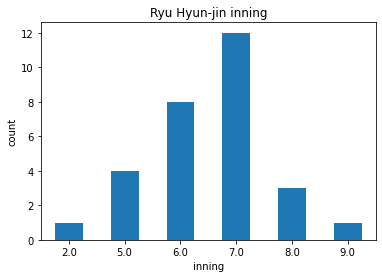

In [35]:
inning.value_counts().sort_index().plot.bar()
plt.xticks(rotation=0)
plt.ylabel('count')
plt.xlabel('inning')
plt.title('Ryu Hyun-jin inning')

In [36]:
# 총 이닝수
total_inning = inning.sum()
total_inning

187.0